In [1]:
!pip install scikit-fuzzy #colab에 skfuzzy 안깔려져있다

In [2]:
import numpy as np
import skfuzzy as fuzz # 구글 코랩에 안깔려있다
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality') # 입력변수 범위 정함 0~10값, 이름 정함
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service') # 또 다른 입력변수 범위 정함
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip') # 출력변수 0~25

# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(3) # 3개로 나눈다
service.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13]) # tri 트라이앵글
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

In [3]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium']) 
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high']) # 서비스 좋거나(OR) 퀄리티 좋으면(THEN) tip=high

In [4]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3]) # 컨트롤 모델 생성

In [5]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [6]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 6.5 # 음식 퀄리티
tipping.input['service'] = 9.8 # 서비스 퀄리티

# Crunch the numbers
tipping.compute() # 퍼지 추론 시작

19.847607361963192


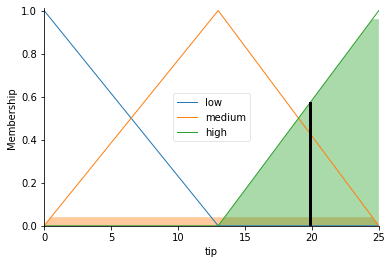

In [7]:
print(tipping.output['tip']) #결론
tip.view(sim=tipping) # 19.84% tip